**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4033 - Visión computacional para imágenes y video**

Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

**Semana 7**
Algoritmos de extracción de características

9. Image Matching

**EQUIPO 48**:

* José Alberto Rodríguez Sotomayor - A01796604
* André Maximiliano Hernández Bornn - A01795190
* César Armando Prieto Siller - A01796382
* Hector Magaña Torres - A00823440





# 9. Image Matching

## Table of Contents
1. [Libraries](#libraries)
1. [ORB Matching](#orb)
1. [SIFT Matching](#sift)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ORB (Oriented FAST and Rotated BRIEF) <a class="anchor" id="orb" ></a>

- Developed at OpenCV labs by Ethan Rublee, Vincent Rabaud, Kurt Konolige, and Gary R. Bradski in 2011
- Efficient and viable alternative to SIFT and SURF (patented algorithms)
- ORB is free to use
- Feature detection
- ORB builds on FAST keypoint detector + BRIEF descriptor

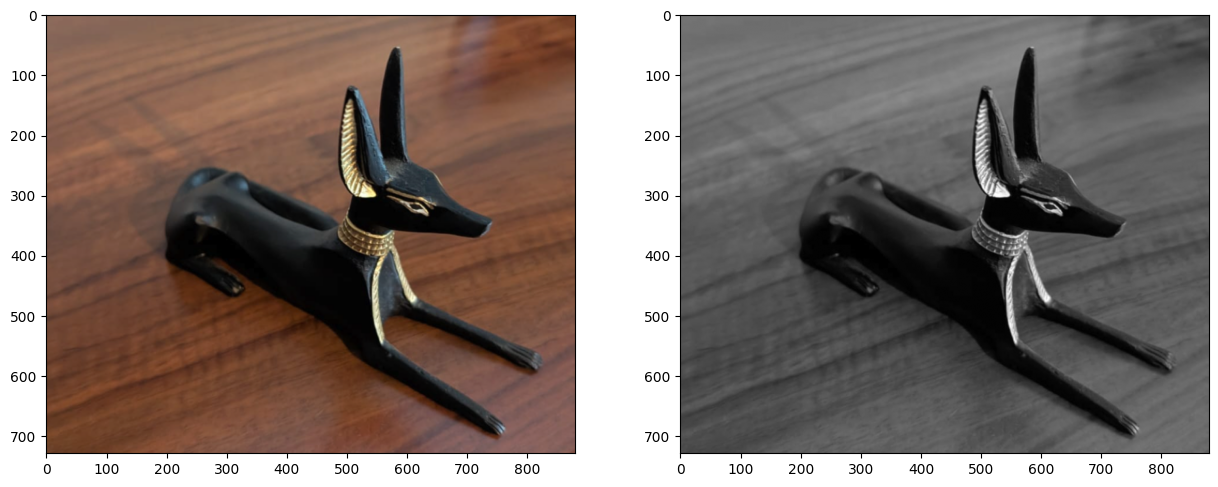

In [ ]:
#reading image
img = cv2.imread('/content/drive/MyDrive/Equipo 48/Actividad 7.2/anubisH1.png')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

### Create test image by adding Scale Invariance and Rotational Invariance

In [ ]:
test_image = cv2.pyrDown(img_color)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

### Display traning image and testing image

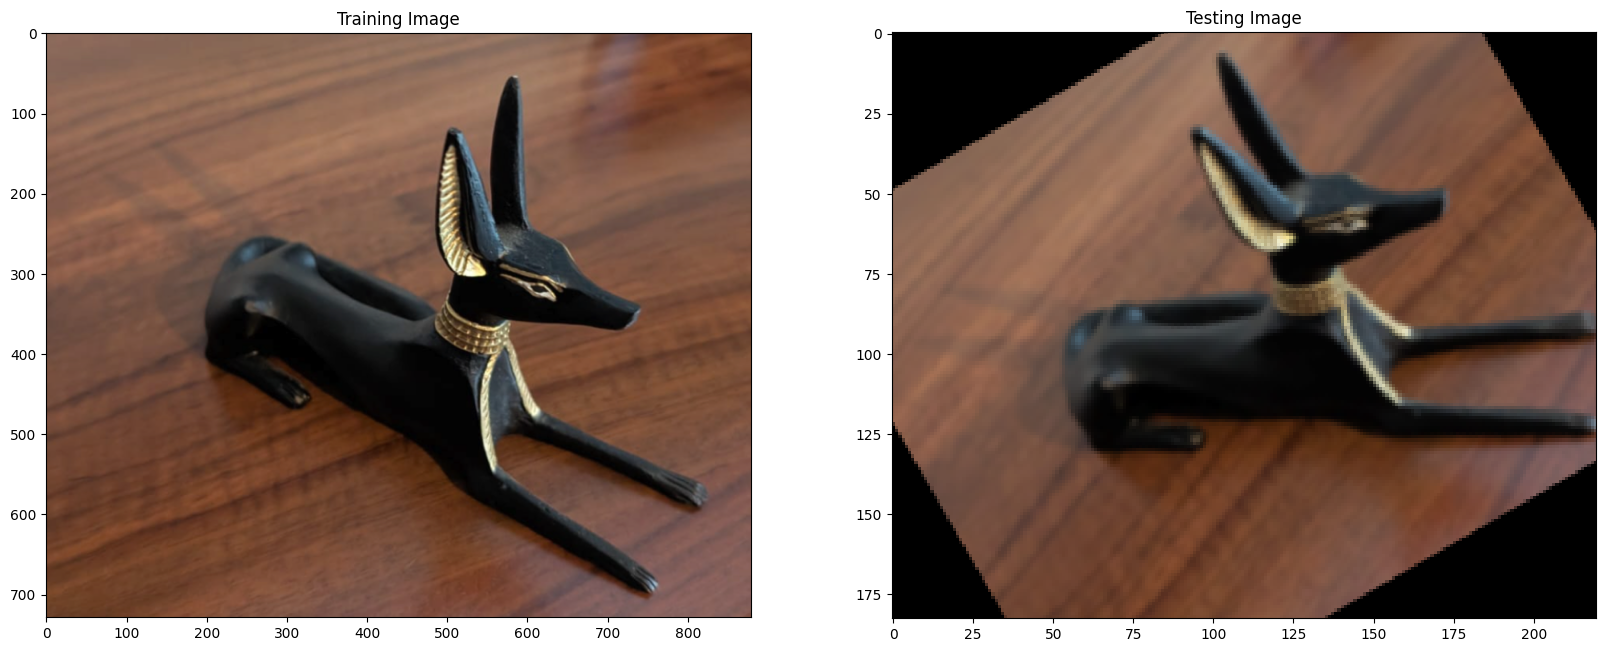

In [ ]:
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(img_color)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

### ORB

In [ ]:
orb = cv2.ORB_create()

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  212


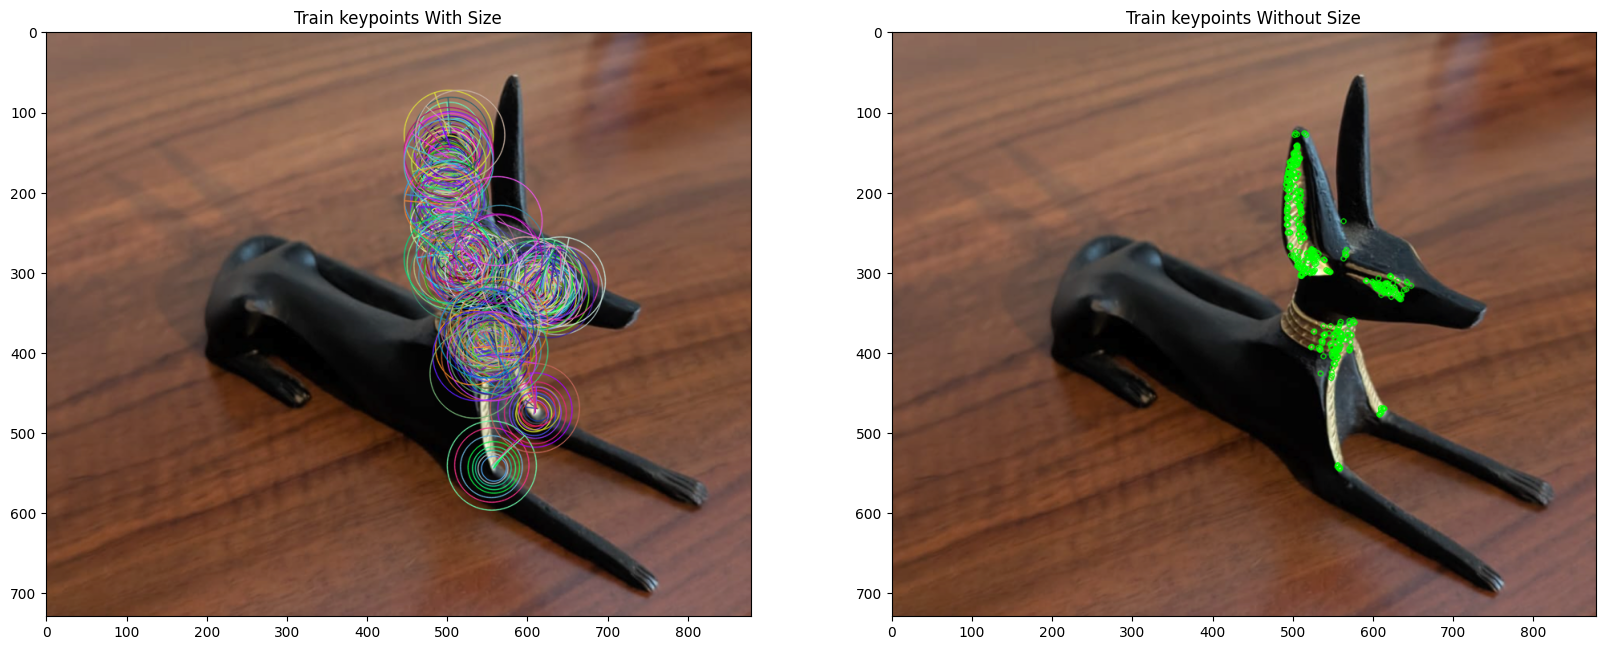

In [ ]:
train_keypoints, train_descriptor = orb.detectAndCompute(img_color, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(img_color)
keypoints_with_size = np.copy(img_color)

cv2.drawKeypoints(img_color, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(img_color, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

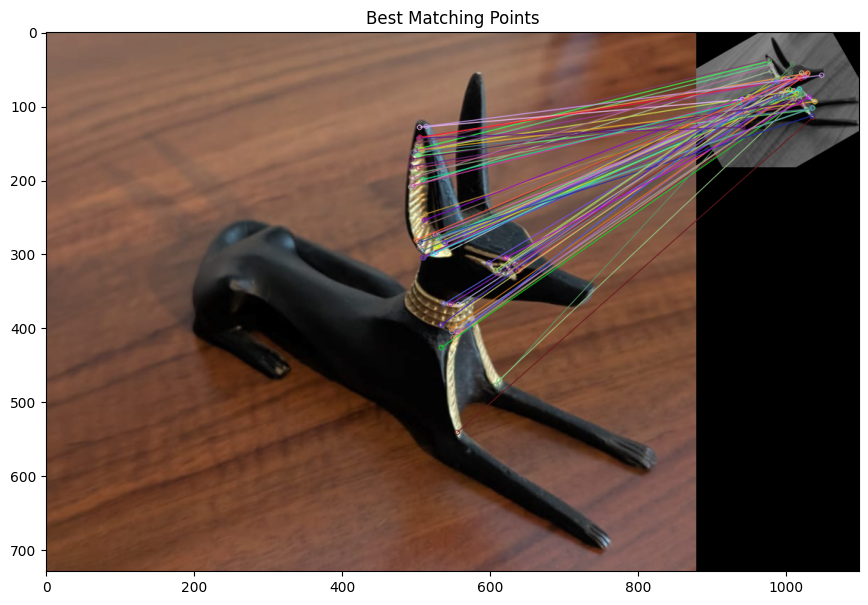


Number of Matching Keypoints Between The Training and Query Images:  74


In [ ]:

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(img_color, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## SIFT Matching (Scale Invariant Feature Transform) <a class="anchor" id="sift" ></a>

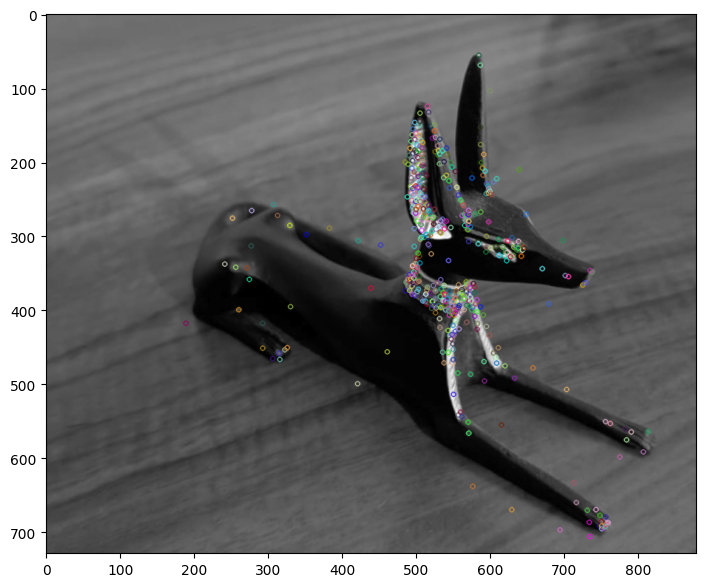

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Equipo 48/Actividad 7.2/anubisH1.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

### Matching different images

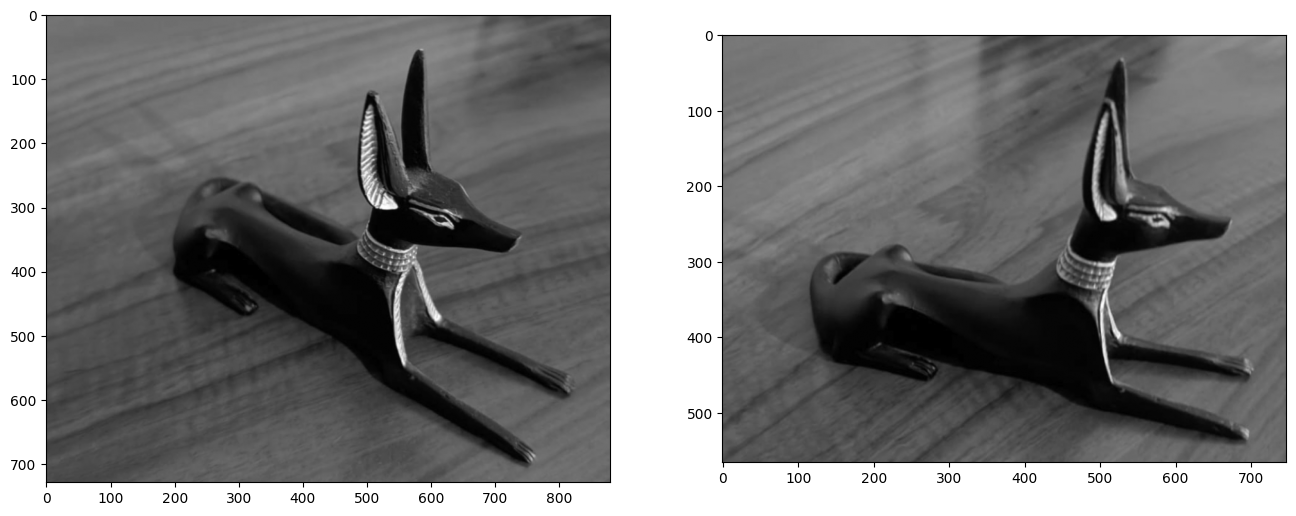

In [ ]:
# read images
img1 = cv2.imread('/content/drive/MyDrive/Equipo 48/Actividad 7.2/anubisH1.png')
img2 = cv2.imread('/content/drive/MyDrive/Equipo 48/Actividad 7.2/AnubisH2.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

### Extracting Keypoints with SIFT

In [ ]:
#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(507, 259)

### Feature Matching

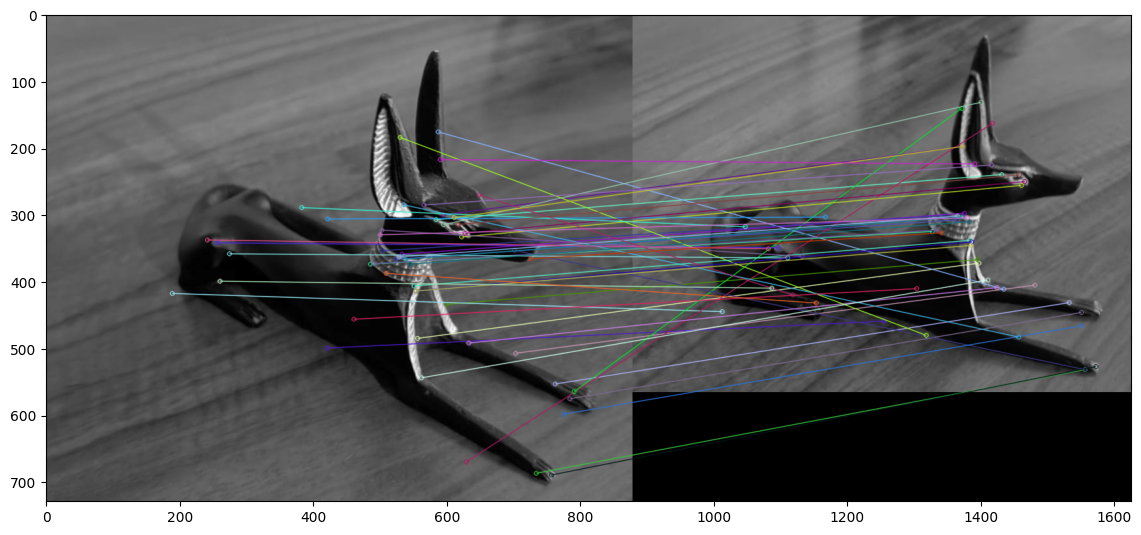

(<matplotlib.image.AxesImage at 0x7ca490f307a0>, None)

In [ ]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

El objetivo de este experimento fue comparar la robustez de los descriptores ORB (Oriented FAST and Rotated BRIEF) y SIFT (Scale-Invariant Feature Transform) al emparejar dos imágenes del mismo objeto bajo variaciones de iluminación, escala y perspectiva.

1. ORB (Oriented FAST and Rotated BRIEF)
El resultado del emparejamiento con ORB muestra las siguientes características:

Velocidad y Densidad: ORB (un descriptor diseñado para ser rápido y eficiente) logra encontrar una gran cantidad de puntos clave y, por lo tanto, produce una alta densidad de líneas de emparejamiento.

Sensibilidad a la Iluminación y el Color: Se observa que las líneas son más dispersas y abarcan una mayor área del fondo y de la mesa. En la imagen de la izquierda (a color) hay más ruido visual, y ORB es más sensible a estos cambios, lo que resulta en un número mayor de "matches" erróneos (outliers), especialmente en las áreas de transición de color y brillo en la mesa.

Robustez Limitada: Aunque ORB es invariante a la rotación y bastante robusto, en presencia de cambios de perspectiva y la variación de color/iluminación entre las dos mitades, el conjunto de emparejamientos aparece más desordenado y con menor coherencia geométrica que SIFT.

2. SIFT (Scale-Invariant Feature Transform)
El resultado del emparejamiento con SIFT muestra un comportamiento superior para este escenario:

Robustez y Localización: SIFT demuestra una mayor robustez ante la variación de escala, rotación e iluminación (al menos en el dominio de la escala de grises de la imagen de la derecha). Los matches se concentran de manera más coherente y densa sobre el objeto principal (la figura de cánido).

Invariancia de Escala: SIFT es inherentemente diseñado para ser invariante a la escala. Esto se evidencia al mantener matches de alta calidad, a pesar de que la figura parece estar ligeramente más cerca o rotada en la imagen de la derecha.

Menos Outliers: A pesar de las transformaciones geométricas y los reflejos en la superficie de la mesa (que podrían confundir a otros detectores), SIFT parece haber encontrado un conjunto de matches más geométricamente consistentes y con menos outliers evidentes que ORB.

## Conclusión General
La comparación visual sugiere que SIFT fue el descriptor más robusto y efectivo para este problema de emparejamiento bajo variaciones.

SIFT es la mejor opción cuando la precisión y la invariancia a grandes cambios de escala o perspectiva son cruciales, especialmente en entornos con iluminación variable.

ORB es ideal cuando la velocidad es la prioridad y las variaciones de escala/perspectiva son mínimas. Sin embargo, su mayor sensibilidad al ruido de iluminación y al cambio de escala lo hizo menos preciso que SIFT en este caso.